In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import constant
import tools

# Load Data

In [2]:
windmill = pd.read_csv(constant.windmill_path)

In [71]:
windmill = windmill[["GSRN", "Turbine_type", "Placement", "UTM_x", "UTM_y", "Capacity_kw", "Rotor_diameter", "Navhub_height", "grid", "Slope", "Elevation", "Roughness"]]
windmill = windmill[~windmill["UTM_x"].isnull()][~windmill["UTM_y"].isnull()][windmill["grid"] != 0]
windmill["Slope"] = windmill["Slope"].replace(-1, 0)
windmill["Elevation"] = windmill["Elevation"].replace(-1, 0)
windmill["Roughness"] = windmill["Roughness"].replace(-1, 0)
windmill = windmill[~windmill["Turbine_type"].isin(["H","M"])]
cols = windmill.columns

In [72]:
windmill

,GSRN,Turbine_type,Placement,UTM_x,UTM_y,Capacity_kw,Rotor_diameter,Navhub_height,grid,Slope,Elevation,Roughness
8,570714700000000102,W,LAND,717690.0,6167403.0,300.0,31.0,30.0,652,5.885,2.2,0.1
11,570714700000000133,W,LAND,719902.0,6167171.0,1000.0,50.0,55.0,652,1.432,2.0,1.0
12,570714700000000140,W,LAND,719970.0,6167337.0,660.0,47.0,40.0,652,0.000,2.0,0.0
13,570714700000000157,W,LAND,720031.0,6167484.0,660.0,47.0,40.0,652,0.000,2.0,1.5
28,570714700000000317,W,LAND,704171.0,6199826.0,660.0,47.0,40.0,696,0.000,21.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9124,571313174001699894,W,LAND,644459.0,6073175.0,3600.0,126.0,87.0,771,0.000,1.0,0.1
9125,571313174001699900,W,LAND,644136.0,6073257.0,3600.0,126.0,87.0,771,1.432,1.0,0.1
9129,571313174001764448,W,LAND,702483.0,6132921.0,225.0,29.0,31.5,650,0.000,22.0,0.1
9157,571313174116253585,W,LAND,694932.0,6175477.0,850.0,52.0,44.0,736,1.432,12.8,0.1


In [73]:
windmill.to_csv("data/windmill_cleaned_WP.csv", index=False)

## Windmill LAND and SINGLE

Total number of LW is 3906

In [131]:
windmill = pd.read_csv("data/windmill_cleaned_WP.csv")

### Capacity_kw distribution

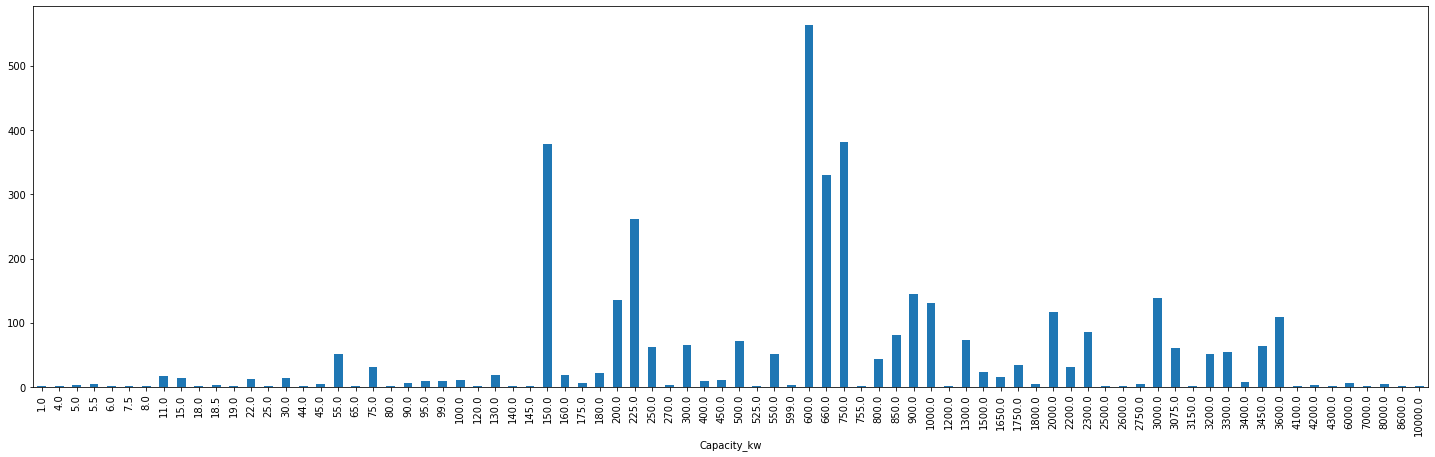

In [90]:
plt.figure(figsize=(25,7))
windmill_LW.groupby("Capacity_kw").count()["GSRN"].plot.bar()

## Roughness distribution

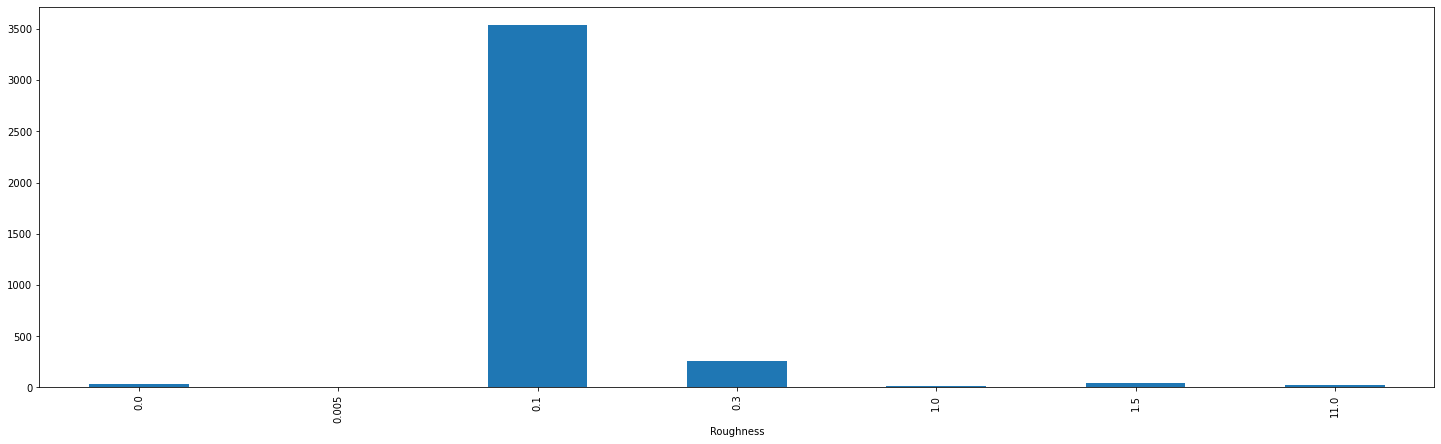

In [133]:
plt.figure(figsize=(25,7))
windmill_LW.groupby("Roughness").count()["GSRN"].plot.bar()

### Chose Capacity == 600
The number of sample is 564, 14.4% of total.

In [104]:
windmill_LW_600 = windmill_LW[windmill_LW["Capacity_kw"] == 600]

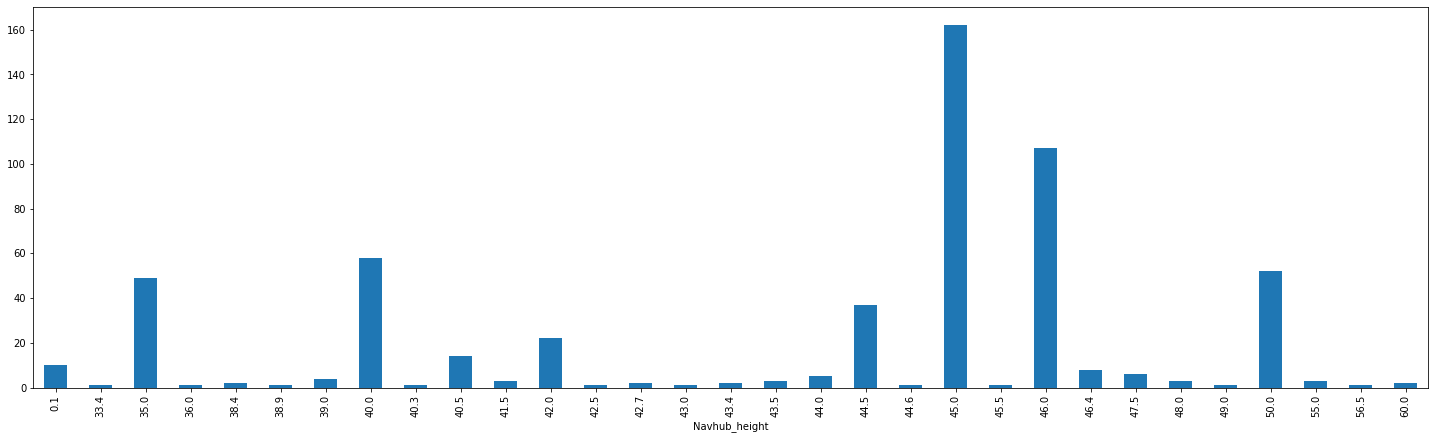

In [105]:
plt.figure(figsize=(25,7))
windmill_LW_600.groupby("Navhub_height").count()["GSRN"].plot.bar()

In [106]:
windmill_LW_600 = windmill_LW_600[windmill_LW_600["Navhub_height"] == 45]

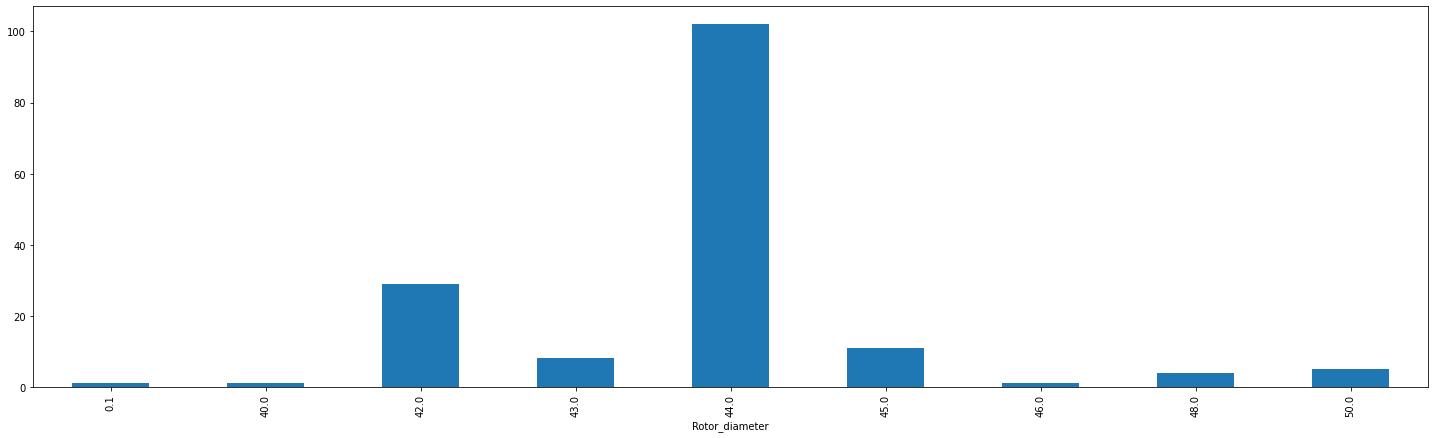

In [107]:
plt.figure(figsize=(25,7))
windmill_LW_600.groupby("Rotor_diameter").count()["GSRN"].plot.bar()

In [108]:
windmill_LW_600 = windmill_LW_600[windmill_LW_600["Rotor_diameter"] == 44]

In [109]:
cnt = windmill_LW_600.count()["GSRN"]
cnt

102

In [110]:
cnt/len(windmill_LW)

0.026113671274961597

### Filter and Clean by basic features

In [113]:
cols = ["Slope", "Elevation", "Roughness"]

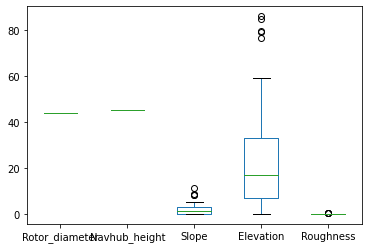

In [112]:
windmill_LW_600[cols].plot.box()

In [114]:
windmill_LW_600[cols].describe()

,Slope,Elevation,Roughness
count,102.000000,102.000000,102.000000
mean,1.794176,22.737882,0.107843
std,2.062410,19.930977,0.039013
min,0.000000,0.000000,0.100000
25%,0.000000,7.000000,0.100000
50%,1.432000,17.000000,0.100000
75%,2.862000,33.167250,0.100000
max,11.310000,85.922000,0.300000


In [118]:
windmill_LW_600[windmill_LW_600["Roughness"] == 0.1]

,GSRN,Turbine_type,Placement,UTM_x,UTM_y,Capacity_kw,Rotor_diameter,Navhub_height,grid,Slope,Elevation,Roughness
29,570714700000002786,W,LAND,683346.000,6136722.000,600.0,44.0,45.0,734,1.013,25.03,0.1
365,570714700000010361,W,LAND,696808.488,6077316.210,600.0,44.0,45.0,647,0.000,22.00,0.1
366,570714700000010378,W,LAND,696813.261,6077122.971,600.0,44.0,45.0,647,1.013,23.00,0.1
371,570714700000010422,W,LAND,642676.918,6092060.023,600.0,44.0,45.0,773,0.000,2.00,0.1
427,570714700000011009,W,LAND,646896.899,6068304.246,600.0,44.0,45.0,771,0.000,0.00,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...
2795,570715000000052767,W,LAND,596816.000,6101958.000,600.0,44.0,45.0,898,2.264,31.00,0.1
2812,570715000000053382,W,LAND,582603.000,6124198.000,600.0,44.0,45.0,941,2.862,40.86,0.1
2813,570715000000053399,W,LAND,602073.000,6130963.000,600.0,44.0,45.0,900,3.200,41.00,0.1
2816,570715000000053429,W,LAND,573686.000,6150873.000,600.0,44.0,45.0,985,2.862,44.72,0.1


In [125]:
windmill_LW_600[windmill_LW_600["Slope"] == 0]

,GSRN,Turbine_type,Placement,UTM_x,UTM_y,Capacity_kw,Rotor_diameter,Navhub_height,grid,Slope,Elevation,Roughness
365,570714700000010361,W,LAND,696808.488,6077316.210,600.0,44.0,45.0,647,0.0,22.000,0.1
371,570714700000010422,W,LAND,642676.918,6092060.023,600.0,44.0,45.0,773,0.0,2.000,0.1
427,570714700000011009,W,LAND,646896.899,6068304.246,600.0,44.0,45.0,771,0.0,0.000,0.1
428,570714700000011016,W,LAND,646867.898,6068832.241,600.0,44.0,45.0,771,0.0,0.000,0.1
429,570714700000011023,W,LAND,646736.900,6068370.246,600.0,44.0,45.0,771,0.0,0.000,0.1
431,570714700000011047,W,LAND,632622.996,6086512.089,600.0,44.0,45.0,814,0.0,9.000,0.1
432,570714700000011054,W,LAND,632665.996,6086676.087,600.0,44.0,45.0,814,0.0,8.000,0.1
433,570714700000011061,W,LAND,632434.997,6086714.087,600.0,44.0,45.0,814,0.0,8.000,0.1
434,570714700000011078,W,LAND,632526.996,6086872.086,600.0,44.0,45.0,814,0.0,8.000,0.1
436,570714700000011092,W,LAND,632356.997,6087036.085,600.0,44.0,45.0,814,0.0,6.000,0.1


In [127]:
windmill_LW_600[windmill_LW_600["grid"] == 773]

,GSRN,Turbine_type,Placement,UTM_x,UTM_y,Capacity_kw,Rotor_diameter,Navhub_height,grid,Slope,Elevation,Roughness
371,570714700000010422,W,LAND,642676.918,6092060.023,600.0,44.0,45.0,773,0.0,2.0,0.1


In [126]:
windmill_LW_600[windmill_LW_600["grid"] == 773]

,GSRN,Turbine_type,Placement,UTM_x,UTM_y,Capacity_kw,Rotor_diameter,Navhub_height,grid,Slope,Elevation,Roughness
371,570714700000010422,W,LAND,642676.918,6092060.023,600.0,44.0,45.0,773,0.0,2.0,0.1


## Choose 570714700000010422
570714700000010422 has the most identity    Capacity_kw 660, Rotor_diameter 44, Navhub_height 45, 
Slope 0, Elevation 2.0    
less weak impact

In [2]:
windmill_LW_600 = pd.read_csv("data/windmill_LW_600.csv")

In [3]:
cols = ["GSRN", "Capacity_kw", "Rotor_diameter", "Navhub_height", "Slope", "Roughness", "Elevation", "grid"]
windmill_geo = windmill_LW_600[windmill_LW_600["GSRN"] == 570714700000010422][cols]

In [4]:
windmill_geo.to_csv("data/windmill_for_geoanalysis.csv", index=False)

In [117]:
windmill_LW_600.to_csv("data/windmill_LW_600.csv", index=False)

## Windmill LAND and PARK

In [132]:
windmill_LW = windmill[windmill["Placement"] == "LAND"][windmill["Turbine_type"] == "W"].dropna().reset_index(drop=True)
len(windmill_LW)

3906

In [41]:
windmill_LP = windmill[windmill["Placement"] == "LAND"][windmill["Turbine_type"] == "P"].reset_index(drop=True)
len(windmill_LP)

418

In [42]:
windmill_HW = windmill[windmill["Placement"] == "HAV"][windmill["Turbine_type"] == "W"].dropna().reset_index(drop=True)
len(windmill_HW)

17

In [43]:
windmill_HP = windmill[windmill["Placement"] == "HAV"][windmill["Turbine_type"] == "W"].reset_index(drop=True)
len(windmill_HP)

17

# Geo Impact Analysis

# SpectralClustering
## Clustering of windmills without Geodata

In [9]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster.elbow import kelbow_visualizer

In [99]:
def SpectralClustering_elbow(df,k=(2,10)):
    # df = StandardScaler().fit_transform(df)*3
    # Instantiate the clustering model and visualizer
    kelbow_visualizer(SpectralClustering(random_state=3, assign_labels='discretize'), df, k=k)

In [96]:
def SpectralClustering_simple(df, k):
    # df = StandardScaler().fit_transform(df)*3
    # Instantiate the clustering model and visualizer
    sc = SpectralClustering(random_state=3, assign_labels='discretize', n_clusters=k)
    cluster = sc.fit_predict(df)
    return cluster

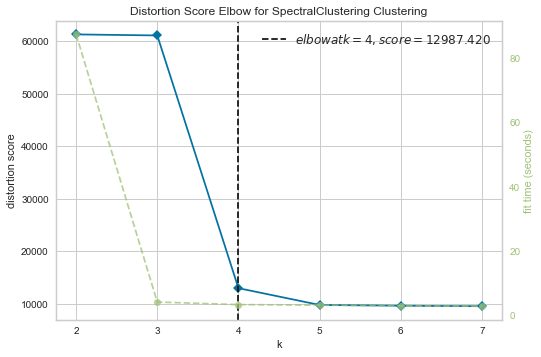

In [123]:
feat_cols = ["Capacity_kw", "Rotor_diameter", "Navhub_height"]
windmill_c = windmill_LW[feat_cols]
windmill_c = StandardScaler().fit_transform(windmill_c)
windmill_c[:,0] =  windmill_c[:,0] * 3
windmill_c[:,1] =  windmill_c[:,1] * 2
windmill_c[:,2] =  windmill_c[:,2] * 2
SpectralClustering_elbow(windmill_c,(2,8))

In [124]:
cluster = SpectralClustering_simple(windmill_c, 4)
windmill_LW["wm_cluster"] = pd.Series(cluster)
windmill_LW.groupby("wm_cluster")["wm_cluster"].count()

wm_cluster
0    3121
1       7
2     771
3       7
Name: wm_cluster, dtype: int64

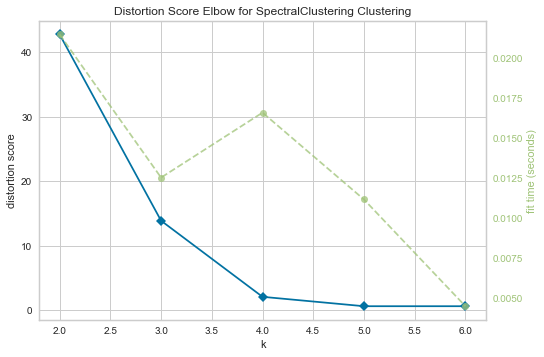

In [129]:
windmill_c = windmill_HW[feat_cols]
windmill_c = StandardScaler().fit_transform(windmill_c)
windmill_c[:,0] =  windmill_c[:,0] * 3
windmill_c[:,1] =  windmill_c[:,1] * 2
windmill_c[:,2] =  windmill_c[:,2] * 2
SpectralClustering_elbow(windmill_c,(2,7))

In [130]:
cluster = SpectralClustering_simple(windmill_c, 4)
windmill_HW["wm_cluster"] = pd.Series(cluster)
windmill_HW.groupby("wm_cluster")["wm_cluster"].count()

wm_cluster
0    11
1     1
2     3
3     2
Name: wm_cluster, dtype: int64

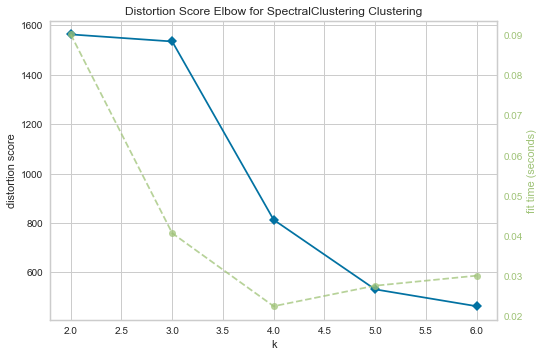

In [137]:
feat_cols = ["Capacity_kw"]
windmill_c = windmill_LP[feat_cols]
windmill_c = StandardScaler().fit_transform(windmill_c)
windmill_c =  windmill_c * 3
SpectralClustering_elbow(windmill_c, (2,7))

In [138]:
cluster = SpectralClustering_simple(windmill_c, 5)
windmill_LP["wm_cluster"] = pd.Series(cluster)
windmill_LP.groupby("wm_cluster")["wm_cluster"].count()

wm_cluster
0    381
1      3
2      7
3      3
4     24
Name: wm_cluster, dtype: int64

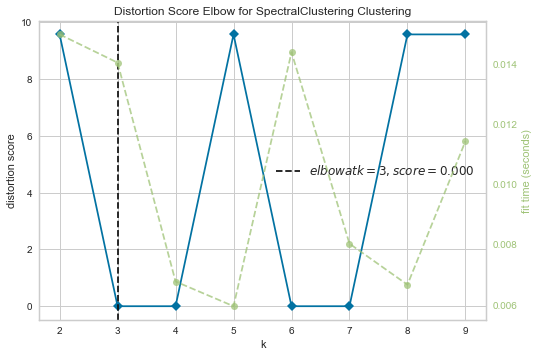

In [139]:
windmill_c = windmill_HP[feat_cols]
windmill_c = StandardScaler().fit_transform(windmill_c)
windmill_c =  windmill_c * 3
SpectralClustering_elbow(windmill_c)

In [140]:
cluster = SpectralClustering_simple(windmill_c, 3)
windmill_HP["wm_cluster"] = pd.Series(cluster)
windmill_HP.groupby("wm_cluster")["wm_cluster"].count()

wm_cluster
0    13
1     1
2     3
Name: wm_cluster, dtype: int64

## Clustering of windmills with Geodata

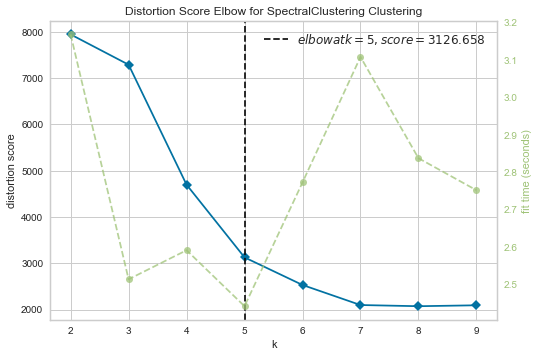

In [142]:
feat_cols = ["Roughness", "Slope", "Elevation"]
windmill_c = windmill_LW[feat_cols]
windmill_c = StandardScaler().fit_transform(windmill_c)
SpectralClustering_elbow(windmill_c)

In [143]:
cluster = SpectralClustering_simple(windmill_c, 5)
windmill_LW["geo_cluster"] = pd.Series(cluster)
windmill_LW.groupby("geo_cluster")["geo_cluster"].count()

geo_cluster
0    3819
1       2
2      13
3      51
4      21
Name: geo_cluster, dtype: int64

In [148]:
windmill_LW.groupby(["wm_cluster", "geo_cluster"])["GSRN"].count()

wm_cluster  geo_cluster
0           0              3067
            1                 2
            2                10
            3                30
            4                12
1           0                 1
            2                 1
            3                 4
            4                 1
2           0               745
            2                 2
            3                16
            4                 8
3           0                 6
            3                 1
Name: GSRN, dtype: int64

In [156]:
windmill_LW["agg_cluster"] = windmill_LW["wm_cluster"].astype(str) + windmill_LW["geo_cluster"].astype(str)

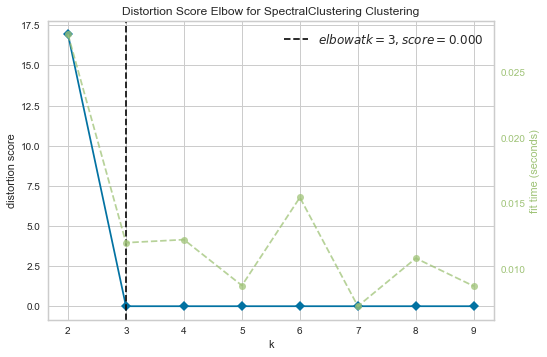

In [144]:
windmill_c = windmill_HW[feat_cols]
windmill_c = StandardScaler().fit_transform(windmill_c)
SpectralClustering_elbow(windmill_c,(2,10))

In [145]:
cluster = SpectralClustering_simple(windmill_c, 3)
windmill_HW["geo_cluster"] = pd.Series(cluster)
windmill_HW.groupby("geo_cluster")["geo_cluster"].count()

geo_cluster
0    15
1     1
2     1
Name: geo_cluster, dtype: int64

In [157]:
windmill_HW["agg_cluster"] = windmill_HW["wm_cluster"].astype(str) + windmill_HW["geo_cluster"].astype(str)

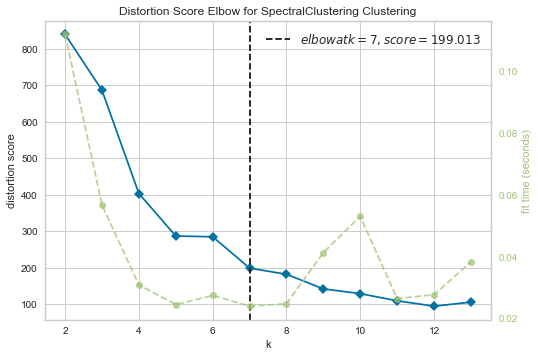

In [146]:
windmill_c = windmill_LP[feat_cols]
windmill_c = StandardScaler().fit_transform(windmill_c)
SpectralClustering_elbow(windmill_c, (2,14))

In [147]:
cluster = SpectralClustering_simple(windmill_c, 7)
windmill_LP["geo_cluster"] = pd.Series(cluster)
windmill_LP.groupby("geo_cluster")["geo_cluster"].count()

geo_cluster
0    146
1    104
2      2
3      4
4      3
5      2
6    157
Name: geo_cluster, dtype: int64

In [158]:
windmill_LP["agg_cluster"] = windmill_LP["wm_cluster"].astype(str) + windmill_LP["geo_cluster"].astype(str)

In [162]:
windmill_LP.groupby(["agg_cluster"])["GSRN"].count()

agg_cluster
00    135
01    102
02      1
03      4
04      3
05      2
06    134
16      3
20      2
21      1
26      4
30      1
36      2
40      8
41      1
42      1
46     14
Name: GSRN, dtype: int64

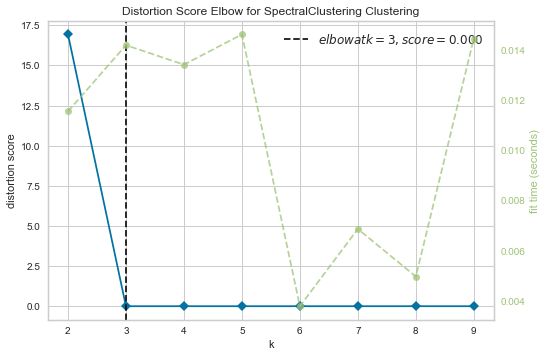

In [59]:
windmill_c = windmill_HP[feat_cols]
windmill_c = StandardScaler().fit_transform(windmill_c)
SpectralClustering_elbow(windmill_c)

In [60]:
cluster = SpectralClustering_simple(windmill_c, 3)
windmill_HP["geo_cluster"] = pd.Series(cluster)
windmill_HP.groupby("geo_cluster")["geo_cluster"].count()

geo_cluster
0    15
1     1
2     1
Name: geo_cluster, dtype: int64

In [159]:
windmill_HP["agg_cluster"] = windmill_HP["wm_cluster"].astype(str) + windmill_HP["geo_cluster"].astype(str)

In [161]:
windmill_HP.groupby(["agg_cluster"])["GSRN"].count()

agg_cluster
00    12
01     1
10     1
20     2
22     1
Name: GSRN, dtype: int64

# Meanshift
## Without Geo

In [ ]:
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
def meanshift_silhouette(df):
    df = StandardScaler().fit_transform(df)
    sc = MeanShift()
    clusters = sc.fit_predict(df)
    silhouette_avg = silhouette_score(df, clusters)
    print(silhouette_avg, len(np.unique(clusters)))
    return clusters

In [ ]:
feat_cols = ["Capacity_kw", "Rotor_diameter", "Navhub_height"]
windmill_c = windmill_LW[feat_cols]
meanshift_silhouette(windmill_c)

In [ ]:
windmill_c = windmill_HW[feat_cols]
meanshift_silhouette(windmill_c)

In [ ]:
feat_cols = ["Capacity_kw"]
windmill_c = windmill_LP[feat_cols]
meanshift_silhouette(windmill_c)

In [ ]:
windmill_c = windmill_HP[feat_cols]
meanshift_silhouette(windmill_c)

## With Geo

In [ ]:
feat_cols = ["Capacity_kw", "Rotor_diameter", "Navhub_height", "Roughness", "Slope"]
windmill_c = windmill_LW[feat_cols]
clusters = meanshift_silhouette(windmill_c)

In [ ]:
windmill_c["Cluster"] = pd.Series(clusters)

In [ ]:
windmill_c.groupby("Cluster")["Cluster"].count()

In [ ]:
windmill_c = windmill_HW[feat_cols]
meanshift_silhouette(windmill_c)

In [ ]:
feat_cols = ["Capacity_kw", "Roughness", "Slope"]
windmill_c = windmill_LP[feat_cols]
meanshift_silhouette(windmill_c)

In [ ]:
windmill_c = windmill_HP[feat_cols]
meanshift_silhouette(windmill_c)

### Without Slope

In [ ]:
feat_cols = ["Capacity_kw", "Rotor_diameter", "Navhub_height", "Roughness"]
windmill_c = windmill_LW[feat_cols]
meanshift_silhouette(windmill_c)

In [ ]:
windmill_c = windmill_HW[feat_cols]
meanshift_silhouette(windmill_c)

In [ ]:
feat_cols = ["Capacity_kw", "Roughness"]
windmill_c = windmill_LP[feat_cols]
meanshift_silhouette(windmill_c)

In [ ]:
windmill_c = windmill_HP[feat_cols]
meanshift_silhouette(windmill_c)

# SpectralClustering
## Without

In [ ]:
windmill_pd = windmill.toPandas()

In [ ]:
windmill_pd.head(3)

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
feat_cols = ["Turbine_type", "Placement", "Capacity_kw", "Rotor_diameter", "Navhub_height"]
windmill_pd1 = windmill_pd[feat_cols]
windmill_pd1 = StandardScaler().fit_transform(windmill_pd1)

for k in range(5,15):
    sc = SpectralClustering(n_clusters=k,random_state=1,n_init=10)
    clusters = sc.fit_predict(windmill_pd1)

    silhouette_avg = silhouette_score(windmill_pd1, clusters)
    print(k, silhouette_avg)

# SpectralClustering
## With

In [ ]:
feat_cols = ["Turbine_type", "Placement", "Capacity_kw", "Rotor_diameter", "Navhub_height", "roughness"]
windmill_pd1 = windmill_pd[feat_cols]
windmill_pd1 = StandardScaler().fit_transform(windmill_pd1)

for k in range(5,15):
    sc = SpectralClustering(n_clusters=k,random_state=1,n_init=10)
    clusters = sc.fit_predict(windmill_pd1)

    silhouette_avg = silhouette_score(windmill_pd1, clusters)
    print(k, silhouette_avg)